<div class="alert alert-block alert-info" style="margin-top: 20px"><h1>medibuddy</h1></div>

<div class="alert alert-block alert-danger" style="margin-top: 20px">
1. Does the gender of the person matter for the company as a constraint for 
extending policies?<br>
2. What is the average amount of money the company spent over each policy 
cover?<br>
3. Could you advice if the company needs to offer separate policies based upon the 
geographic location of the person?<br>
4. Does the no. of dependents make a difference in the amount claimed?<br>
5. Does a study of persons BMI get the company any idea for the insurance claim 
that it would extend?<br>
6. Is it needed for the company to understand whether the person covered is a 
smoker or a non-smoker?<br>
7. Does age have any barrier on the insurance claimed?<br>
8. Can the company extend certain discounts after checking the health status 
(BMI) in this case?<br>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df1 = pd.read_excel('Data/Medibuddy Insurance Data Price (1) (2).xlsx')
df1.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


In [3]:
df2 = pd.read_excel('Data/Medibuddy insurance data personal details (1) (2).xlsx')
df2.head()

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [4]:
df1.shape

(1338, 5)

In [5]:
df2.shape

(1338, 4)

In [6]:
df1.isnull().sum()

Policy no.        0
age               0
sex               0
bmi               0
charges in INR    0
dtype: int64

In [7]:
df2.isnull().sum()

Policy no.    0
children      0
smoker        0
region        0
dtype: int64

In [8]:
merge = pd.merge(df1,df2, on = "Policy no.", how='outer')

In [9]:
merge.head()

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest


In [10]:
merge.shape

(1338, 8)

In [11]:
merge.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [12]:
merge.groupby('sex')['charges in INR'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges in INR, dtype: float64

<Axes: xlabel='sex', ylabel='charges in INR'>

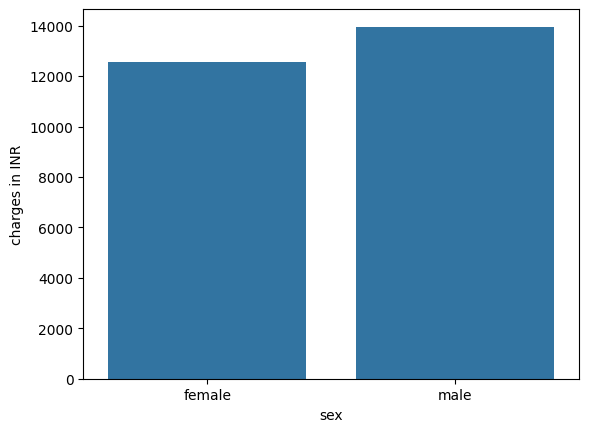

In [13]:
sns.barplot(merge.groupby('sex')['charges in INR'].mean())

`Observation`: Gender is not a constraint for the company for policy, however there is slightly difference in the term of cost incurred by calculating mean cost of both sexes(i.e male: 13956.76, female: 12569.58)

In [14]:
merge['charges in INR'].mean()

13270.422265141257

`Observation`: The average amount of money the company spent over each policy cover is about `13270.5` rupees

In [15]:
# advice if the company needs to offer separate policies based upon the geographic location of the person?
merge.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

`Observation`: most of the policy are sold in `southeast`, but `not with significant difference` with other region.

In [16]:
 # Does the no. of dependents make a difference in the amount claimed
merge.groupby('children')['charges in INR'].mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges in INR, dtype: float64

<Axes: xlabel='children', ylabel='charges in INR'>

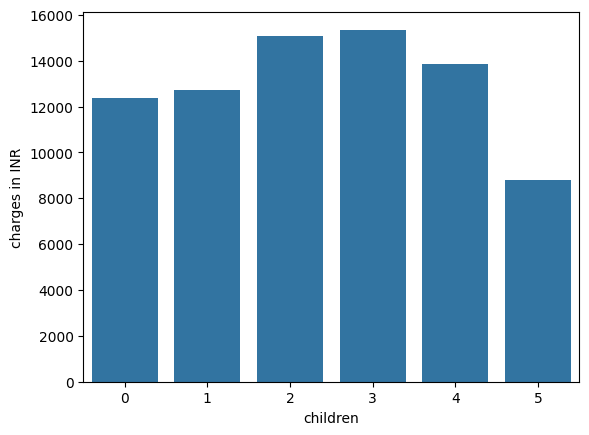

In [17]:
sns.barplot(merge.groupby('children')['charges in INR'].mean())

`Observation`: The amout increases as the number of children increases , but upto `3` childern only, after that it decrease on 4 , and drastic drop when its 5 which is also lowest

In [18]:
# Does a study of persons BMI get the company any idea for the insurance claim that it would extend?

merge.groupby('bmi')['charges in INR'].mean()

bmi
15.960     1694.796400
16.815     4904.000350
17.195    14455.644050
17.290     7813.353433
17.385     2775.192150
              ...     
48.070     9432.925300
49.060    11381.325400
50.380     2438.055200
52.580    44501.398200
53.130     1163.462700
Name: charges in INR, Length: 548, dtype: float64

<Axes: xlabel='bmi', ylabel='charges in INR'>

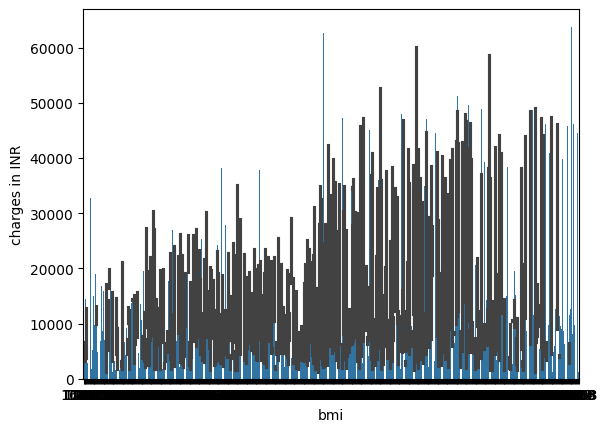

In [19]:
sns.barplot(x='bmi',y='charges in INR', data=merge)

`Observation`: there is no clear linear trends , but on large view as bmi increases charges increase( there are lot of exceptions)

In [20]:
# it needed for the company to understand whether the person covered is a smoker or a non-smoker
merge.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

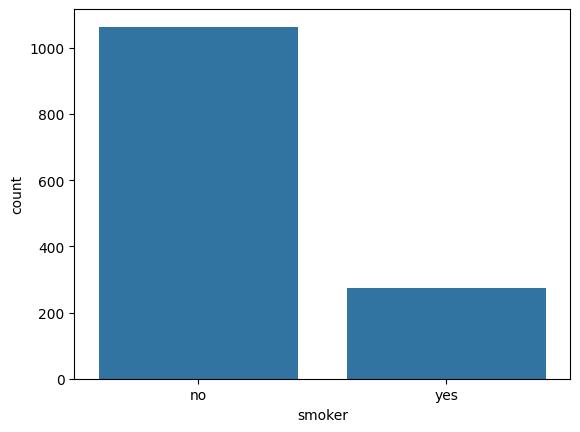

In [21]:
sns.barplot(merge.smoker.value_counts())

In [22]:
merge.groupby('smoker')['charges in INR'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges in INR, dtype: float64

`Observation`: the charges for smoker is almost 4X high than the non smoker, whereas policy taken by non smoker is 4 times in number as compare to smoker,  only 20%(approx) ploicy sold to smoker at avearge price of 32050.23 

In [23]:
# Does age have any barrier on the insurance claimed
merge.age.value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

### we have ages for cover 18-64

<Axes: xlabel='age', ylabel='count'>

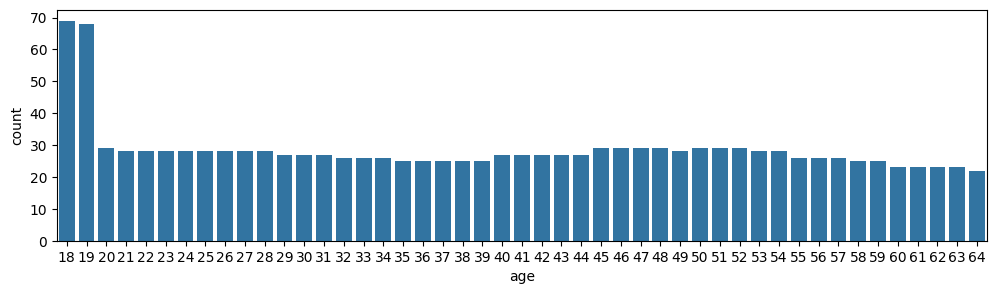

In [24]:
plt.figure(figsize=(12,3))
sns.barplot(merge.age.value_counts())

`Observation`: most of the policy taken by 18 & 19 years old, whereas people of age 64 are least buyer of policy, beside these ages all have approximatly equal no number of buyer, Therefore no imapct of ages on policy.<br>
As 18,19 are so exited for policy cover<br>
But 64 aged are demotited to take policy as it is the last year to take policy 

In [25]:
# Can the company extend certain discounts after checking the health status (BMI) in this case
merge.bmi.value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

<Axes: xlabel='bmi', ylabel='count'>

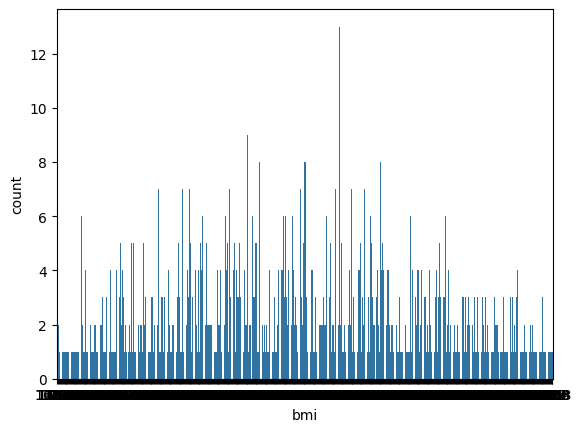

In [26]:
sns.barplot(merge.bmi.value_counts())

`Observation`: BMI having low and high are less attracted to buy policy, so discount can be provide to them 